In [2]:
import rasterio
from rasterio.plot import show
import xgboost as xgb
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import geopandas as gpd

C:\Users\NicolasViasus\AppData\Local\Temp\ipykernel_10960\3072204835.py:10: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [3]:
p_img=r"C:\Users\NicolasViasus\Documents\Temporales_NV\PAC TVH\XGBoost\Orto_50cm.tif"
src=rasterio.open(p_img)
img=src.read()
img

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [5]:
img.shape

(4, 10037, 13364)

In [7]:
img=img.transpose([1,2,0])
img.shape

(10037, 13364, 4)

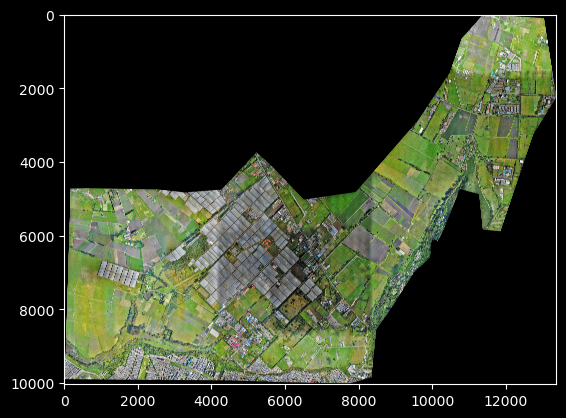

In [8]:
plt.imshow(img)

In [16]:
samples=gpd.read_file(r"C:\Users\NicolasViasus\Documents\Temporales_NV\PAC TVH\XGBoost\Clases\clases1.shp")
samples

,Clase,geometry
0,Infraestructura,POINT (-74.09509 4.77046)
1,Infraestructura,POINT (-74.09478 4.77071)
2,Infraestructura,POINT (-74.09543 4.77065)
3,Infraestructura,POINT (-74.09487 4.77062)
4,Infraestructura,POINT (-74.09545 4.77111)
...,...,...
1864,Infraestructura,POINT (-74.10125 4.75812)
1865,Infraestructura,POINT (-74.10117 4.75820)
1866,Infraestructura,POINT (-74.09371 4.75753)
1867,Infraestructura,POINT (-74.09373 4.75765)


<AxesSubplot:>

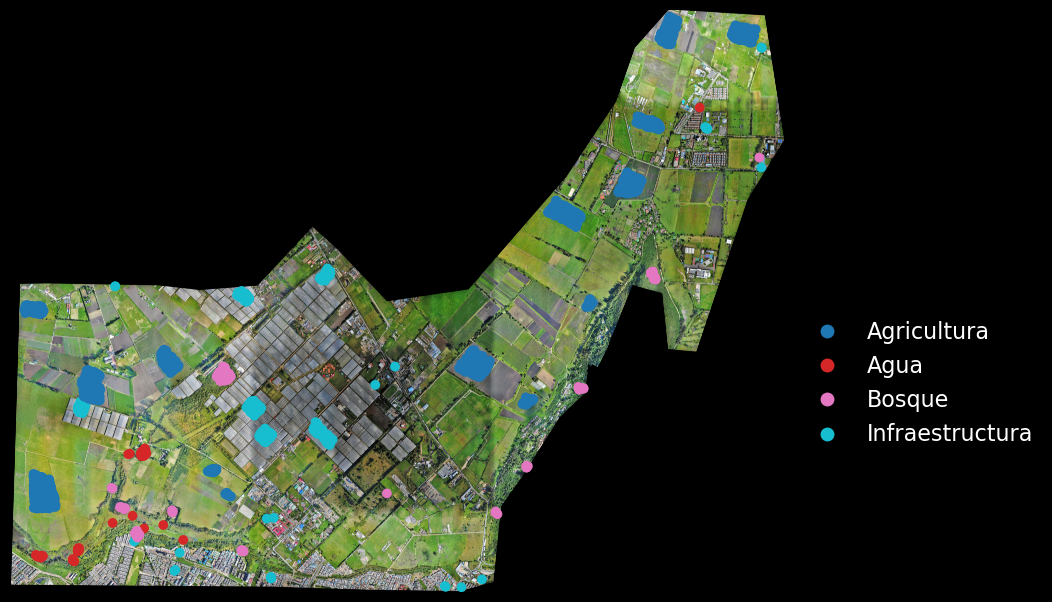

In [17]:
fig,ax=plt.subplots(figsize=(10,10))
samples.plot(column='Clase',categorical=True,cmap='tab10',legend=True,legend_kwds={'bbox_to_anchor':(1,0.5),'loc':'upper left','fontsize':16,'frameon':False}, ax=ax)
ax.axis('off')
show(img.transpose([2,0,1]),transform=src.transform,ax=ax)

In [18]:
samples['geometry']

0       POINT (-74.09509 4.77046)
1       POINT (-74.09478 4.77071)
2       POINT (-74.09543 4.77065)
3       POINT (-74.09487 4.77062)
4       POINT (-74.09545 4.77111)
                  ...            
1864    POINT (-74.10125 4.75812)
1865    POINT (-74.10117 4.75820)
1866    POINT (-74.09371 4.75753)
1867    POINT (-74.09373 4.75765)
1868    POINT (-74.09376 4.75759)
Name: geometry, Length: 1869, dtype: geometry

In [19]:
array_samples = []
for point in samples['geometry']:
  x = point.xy[0][0]
  y = point.xy[1][0]
  row, col = src.index(x,y)
  band_value = []
  for i in range(src.count):
    band_value.append(src.read(i+1)[row,col])
  array_samples.append(band_value)